<a href="https://colab.research.google.com/github/abhisheksharma26/ML-practice/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets , layers, models

import matplotlib.pyplot as plt

import numpy as np 


In [ ]:
(X_train , y_train) ,(X_test , y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:


X_train.shape

X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_test.shape

(10000, 1)

In [22]:
y_train.reshape(-1,)
y_train.shape


(50000, 1)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]




In [23]:



def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])



TypeError: ignored

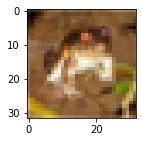

In [ ]:
plot_sample(X_train, y_train , 0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)






Epoch 1/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.9359 - accuracy: 0.3003
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6451 - accuracy: 0.4186
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5572 - accuracy: 0.4536
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4933 - accuracy: 0.4737
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4353 - accuracy: 0.4955


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 




y_pred= ann.predict(X_test)

y_pred_classes= [np.argmax(element)  for element in y_pred]

print("classification Report:\n",classification_report(y_test,y_pred_classes))


classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.56      1000
           1       0.61      0.64      0.62      1000
           2       0.50      0.17      0.26      1000
           3       0.33      0.41      0.37      1000
           4       0.44      0.38      0.40      1000
           5       0.46      0.28      0.34      1000
           6       0.55      0.49      0.52      1000
           7       0.36      0.75      0.49      1000
           8       0.67      0.56      0.61      1000
           9       0.58      0.53      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4602 - accuracy: 0.4815


[1.4601788520812988, 0.4814999997615814]

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [19]:

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 3ms/step - loss: 1.7139 - accuracy: 0.3744
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2082 - accuracy: 0.5723
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0389 - accuracy: 0.6357
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9542 - accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8725 - accuracy: 0.7012
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8070 - accuracy: 0.7184
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7750 - accuracy: 0.7288
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7218 - accuracy: 0.7496
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6899 - accuracy: 0.7644
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.65

In [21]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.9358 - accuracy: 0.6899


[0.9358278512954712, 0.6898999810218811]

In [35]:

y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

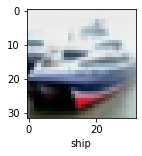

In [37]:
plot_sample(X_test, y_test , 1)

In [28]:
y_pred= cnn.predict(X_test)
y_pred

array([[2.2515266e-03, 5.4241889e-05, 2.5801973e-02, ..., 5.6589815e-05,
        1.1415100e-03, 1.1433404e-03],
       [2.2114850e-04, 2.5388820e-03, 1.2378402e-05, ..., 5.8495271e-09,
        9.9722326e-01, 3.7405371e-06],
       [9.9907473e-02, 2.3631822e-01, 5.6404136e-03, ..., 1.3011944e-02,
        6.1377060e-01, 1.6175367e-02],
       ...,
       [4.6253212e-05, 9.7798538e-06, 2.6704451e-01, ..., 1.0334423e-02,
        8.3261648e-07, 2.0246296e-06],
       [1.0584658e-01, 7.6886728e-02, 1.1099599e-02, ..., 3.0623235e-02,
        1.9977811e-04, 4.7031073e-03],
       [7.4967007e-05, 2.3382986e-06, 9.1262357e-03, ..., 9.7759205e-01,
        1.3850367e-06, 1.3899544e-05]], dtype=float32)

In [27]:


y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [42]:

# Python Program illustrating
# working of argmax()
  
import numpy as geek 
  
# Working on 2D array
array = geek.arange(12).reshape(3, 4)

array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:

  
# No axis mentioned, so works on entire array
print("\nMax element : ", geek.argmax(array))
  


Max element :  11


In [44]:

# returning Indices of the max element
# as per the indices
print("\nIndices of Max element : ", geek.argmax(array, axis=0))
print("\nIndices of Max element : ", geek.argmax(array, axis=1))


Indices of Max element :  [2 2 2 2]

Indices of Max element :  [3 3 3]
